# Pandas 1: Introduction
    Kaela Nelson
    Vol3A
    10/12/17

Lab Objective: Though NumPy and SciPy are powerful tools for numerical computing, they lack some of the high-level functionality necessary for many data science applications. Python’s pandas library, built on NumPy, is designed specifically for data management and analysis. In this lab,
we introduce pandas data structures, syntax, and explore its capabilities for quickly analyzing and presenting data. Lab details are found at http://www.acme.byu.edu/wp-content/uploads/2017/08/Pandas1.pdf.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Problem 1

Create a pandas `Series` where the index labels are the even integers $0,2,\ldots,100$ and the entries are the label squared minus one.
That is, the $n$th entry in the `Series` is $n^2 − 1$ and has label $n$.

In [4]:
ind = [i for i in range(0,51) if i%2 == 0]
vals = [n**2 - 1 for n in ind]
s1 = pd.Series(vals, index=ind)
s1[s1.index%3 == 0] = 0
s1.head()

0     0
2     3
4    15
6     0
8    63
dtype: int64

## Problem 2

Suppose you make an investment of $d$ dollars in a particularly volatile stock.
Every day the value of your stock goes up by \$1$ with probability $p$, or down by \$$1$ with probability $1-p$ (this is an example of a _random walk_).

Write a function that accepts a probability parameter $p$ and an initial amount of money $d$, defaulting to $100$.
Use `pd.date_range()` to create an index of the days from 1 January 2000 to 31 December 2000.
Simulate the daily change of the stock by making one draw from a Bernoulli distribution with parameter $p$ (a binomial distribution with one draw) for each day.
Store the draws in a pandas `Series` with the date index and set the first draw to the initial amount $d$.
Sum the entries cumulatively to get the stock value by day.
Set any negative values to $0$, then plot the series.

Call your function with a few different values of $p$ and $d$ to observe the different possible kinds of behavior.

In [4]:
def random_walk(p, initial_fund=100):
    days = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    draws = np.random.binomial(1, p, len(days))*2 - 1
    s = pd.Series(draws, index=days)
    s[0] = initial_fund
    money = s.cumsum()
    money[money <0] = 0
    money.plot(label=r"$p={}$".format(p))

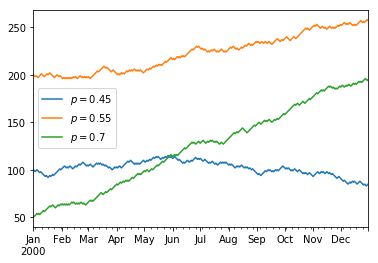

In [5]:
random_walk(.45)
random_walk(.55, 200)
random_walk(.7,50)
plt.legend()

## Problem 3

Use pandas to perform the following SQL query on the ''tables'' constructed below.

`SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'`

In [6]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [7]:
data = studentInfo[studentInfo["Age"] > 19]
data= data[data["Sex"] == 'M']
data[["ID", "Age"]]

,ID,Age
0,0,20
6,6,20


In [8]:
otherInfo
mathInfo

,Grade,ID,Math_Major
0,4.0,0,y
1,3.0,1,n
2,3.5,5,y
3,3.0,6,n
4,4.0,3,n


In [9]:
studentInfo

,Age,Class,ID,Name,Sex
0,20,Sp,0,Mylan,M
1,21,Se,1,Regan,F
2,18,Fr,2,Justin,M
3,22,Se,3,Jess,F
4,19,Sp,4,Jason,M
5,20,J,5,Remi,F
6,20,J,6,Matt,M
7,19,J,7,Alexander,M
8,20,Se,8,JeanMarie,F


## Problem 4

Using a join operation, create a DataFrame containing the ID, age, and GPA of all male individuals. You ought to be able to accomplish this in one line of code.

In [10]:
data2 = pd.merge(studentInfo[studentInfo['Sex']=="M"], otherInfo, on='ID')
data2

,Age,Class,ID,Name,Sex,Financial_Aid,GPA
0,20,Sp,0,Mylan,M,y,3.8
1,18,Fr,2,Justin,M,n,3.0
2,19,Sp,4,Jason,M,n,2.8
3,20,J,6,Matt,M,n,3.8
4,19,J,7,Alexander,M,y,3.4


## Problem 5

The file `crime_data.csv` contains data on types of crimes committed in the United States from 1960 to 2016.
- Load the data into a pandas \li{DataFrame}, using the column names in the file and the column titled
`"Year"` as the index.
Make sure to skip lines that don't contain data.
- Insert a new column into the data frame that contains the crime rate by year (the ratio of `"Total"` column
to the `"Population"` column).
- Plot the crime rate as a function of the year.
- List the 5 years with the highest crime rate in descending order.
- Calculate the average number of total crimes as well as burglary crimes between 1960 and 2012.
- Find the years for which the total number of crimes was below average, but the number of burglaries
was above average.
- Plot the number of murders as a function of the population.
- Select the Population, Violent, and Robbery columns for all years in the 1980s, and save
this smaller data frame to a CSV file `crime_subset.csv`.


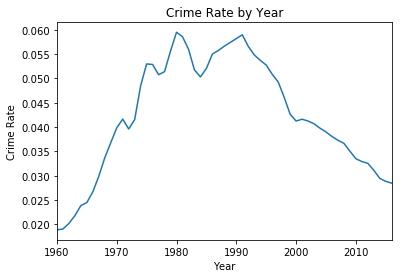

In [4]:
crime_data = pd.read_csv("crime_data.csv", index_col = "Year")
crime_data.dropna()
crime_data["Crime rate by year"] = crime_data["Total"] / crime_data["Population"]
crime_data["Crime rate by year"].plot()
plt.ylabel("Crime Rate")
plt.title("Crime Rate by Year")
plt.show()

In [5]:
highest_rate = crime_data.sort_values('Crime rate by year', ascending=False)
highest_rate = highest_rate[:5]
highest_rate 

,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft,Crime rate by year
Year,,,,,,,,,,,,
1980,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700,0.059500
1991,252177000,14872900,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700,0.058978
1981,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800,0.058582
1990,248709873,14475600,1820130,12655500,23440,102560,639270,1054860,3073900,7945700,1635900,0.058203
1989,248239000,14251400,1646040,12605400,21500,94500,578330,951710,3168200,7872400,1564800,0.057410


In [6]:
ave_total_crimes = np.average(crime_data[0:-4].iloc[:, 1])
ave_burglaries = np.average(crime_data[0:-4].iloc[:, -4])
print ("Ave total:",ave_total_crimes,"Ave burglaries:", ave_burglaries)

Ave total: 10638618.2075 Ave burglaries: 2446402.15094


In [7]:
total_below = crime_data[(crime_data["Total"] < ave_total_crimes) & (crime_data["Burglary"] > ave_burglaries)]
print("Years where total crimes was below average and total burglaries was above:",total_below.index[0], "and",total_below.index[1])

Years where total crimes was below average and total burglaries was above: 1973 and 1974


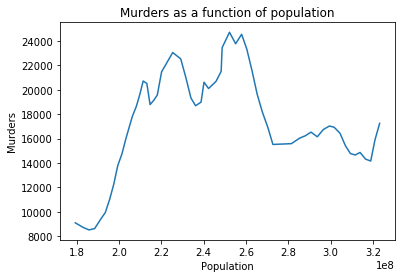

In [8]:
plt.plot(crime_data["Population"], crime_data["Murder"])
plt.ylabel("Murders")
plt.xlabel("Population")
plt.title("Murders as a function of population")
plt.show()

In [9]:
#ls_80s = ['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989']
smaller_data = crime_data.loc[:, ["Population", "Violent", "Robbery"]]
smaller = smaller_data[20:30]
crime_subset = smaller.to_csv("crime_subset.csv")

## Problem 6

In 1912 the RMS _Titanic_ sank after colliding with an iceberg.
The file `titanic.csv` contains data on the incident.
Each row represents a different passenger, and the columns describe various features of the passengers (age, sex, whether or not they survived, etc.)

Start by cleaning the data.
- Read the data into a `DataFrame`.
    Use the first row of the file as the column labels, but do not use any of the columns as the index.
- Drop the columns `"Sibsp"`, `"Parch"`, `"Cabin"`, `"Boat"`, `"Body"`, and `"home.dest"`.
- Drop any entries without data in the `"Survived"` column, then change the remaining entries to `True` or `False` (they start as 1 or 0).
- Replace null entries in the `"Age"` column with the average age.
- Save the new `DataFrame` as `titanic_clean.csv`.

Next, answer the following questions.
- How many people survived? What percentage of passengers survived?
- What was the average price of a ticket? How much did the most expensive ticket cost?
- How old was the oldest survivor? How young was the youngest survivor? What about non-survivors?


In [10]:
titanic_data = pd.read_csv("titanic.csv")
cols_to_drop = ["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"]

titanic_data.drop(cols_to_drop, axis=1, inplace=True)
titanic_data.dropna(subset=["Survived"], inplace=True)
titanic_data.Survived = titanic_data.Survived == 1

ave = titanic_data["Age"].dropna().mean()
titanic_data["Age"].fillna(ave, inplace=True)

survivors = titanic_data[titanic_data["Survived"] == True].count()[1]
percentage_survivors = survivors / titanic_data.count()[1]
ave_price = titanic_data["Fare"].mean()
max_price = titanic_data["Fare"].max()
max_age = titanic_data["Age"].max()
min_age = titanic_data["Age"].min()
max_non_survivor = titanic_data[titanic_data["Survived"] == False]
max_age_ns = max_non_survivor["Age"].max()

min_non_survivor = titanic_data[titanic_data["Survived"] == False]
min_age_ns = max_non_survivor["Age"].min()

titanic_cleaned = titanic_data.to_csv("titanic_clean.csv")

In [11]:
print("People survived, percentage survived:", survivors, "and", percentage_survivors)
print ("ave ticket price, most expensive:", ave_price, "and", max_price)
print("Max and min age of survivors:", max_age, "and", min_age)
print("Max and min age of non survivors:", max_age_ns, "and",  min_age_ns)

People survived, percentage survived: 500 and 0.381970970206
ave ticket price, most expensive: 33.29547928134572 and 512.3292
Max and min age of survivors: 80.0 and 0.1667
Max and min age of non survivors: 74.0 and 0.3333
